In [1]:
# Get system path 
import os
path = os.getcwd()
# Get parent directory
parent = os.path.dirname(path)
#Add parent directory to system path
os.sys.path.insert(0, parent)

from metavision_core.event_io import EventsIterator
import numpy as np
import matplotlib.pyplot as plt

from lib.utils import *
from lib.plot_utils import *   
from lib.event_processing import *

In [5]:
path = "../data/recording_2024-01-19_15-45-11.raw"
mv_iterator = EventsIterator(input_path=path, delta_t=1000000)

frames = []
for evs in mv_iterator:
    # Create an array that transforms the events into an image
    height, width = mv_iterator.get_size()  # Camera Geometry, WHY DOES THIS NOT WORK?

    # Get the indices from ev and create an array with the pixel values
    img = events_colapsing(evs, width, height)
            
    frames.append(img)

In [6]:
print(len(frames))

11


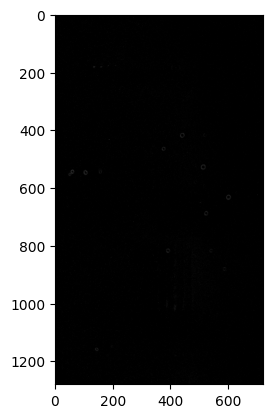

In [7]:
plot_image(frames[1])

In [ ]:
# RUNTIME COMPARATION  

import cv2

def treshold_filter_2(img, treshold):
    '''
    Deletes the pixels with a value below the treshold.

    Parameters
    ----------
    img : numpy array
        Image to be filtered.
    treshold : int
        Treshold value.

    Returns
    -------
    filtered_img : numpy array
        Filtered image.
    '''
    
    # Create a copy of the input image
    filtered_img = np.copy(img)

    # Filter the image with a threshold
    filtered_img[filtered_img < treshold] = 0

    return filtered_img

max_pixel_value = np.max(frames[11])
treshold = round(max_pixel_value*0.7) # 50% of the max pixel value, MODIFY
print(treshold)

# Get the runtimes of the different methods
import time

# Treshold filter
start = time.time()
filtered_frames_1 = []
for frame in frames:
    filtered_frames_1.append(treshold_filter_2(frame, treshold))
end = time.time()
treshold2_time = end - start

# Treshold filter
start = time.time()
filtered_frames_2 = []
for frame in frames:
    filtered_frames_2.append(treshold_filter(frame, treshold))
end = time.time()
treshold_time = end - start

frames = frames/np.max(frames) # Normalize the frames

start = time.time()
filtered_frames_3 = []
for frame in frames:
    filtered_frames_3.append(cv2.threshold(frame, treshold, 1, cv2.THRESH_TOZERO)[1])
end = time.time()
treshold_time_cv = end - start

# Open cv

print(f'Treshold filter time: {treshold_time}', f'Treshold filter time 2: {treshold2_time}',
      f'Treshold filter time cv: {treshold_time_cv}')
# plot_image(filtered_frames_1[11])
plot_image(filtered_frames_3[11])
print(np.max(filtered_frames_1[11]-filtered_frames_3[11]))